### Image Filtering
Image filtering consists of **convolving** the image with a specified kernel.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

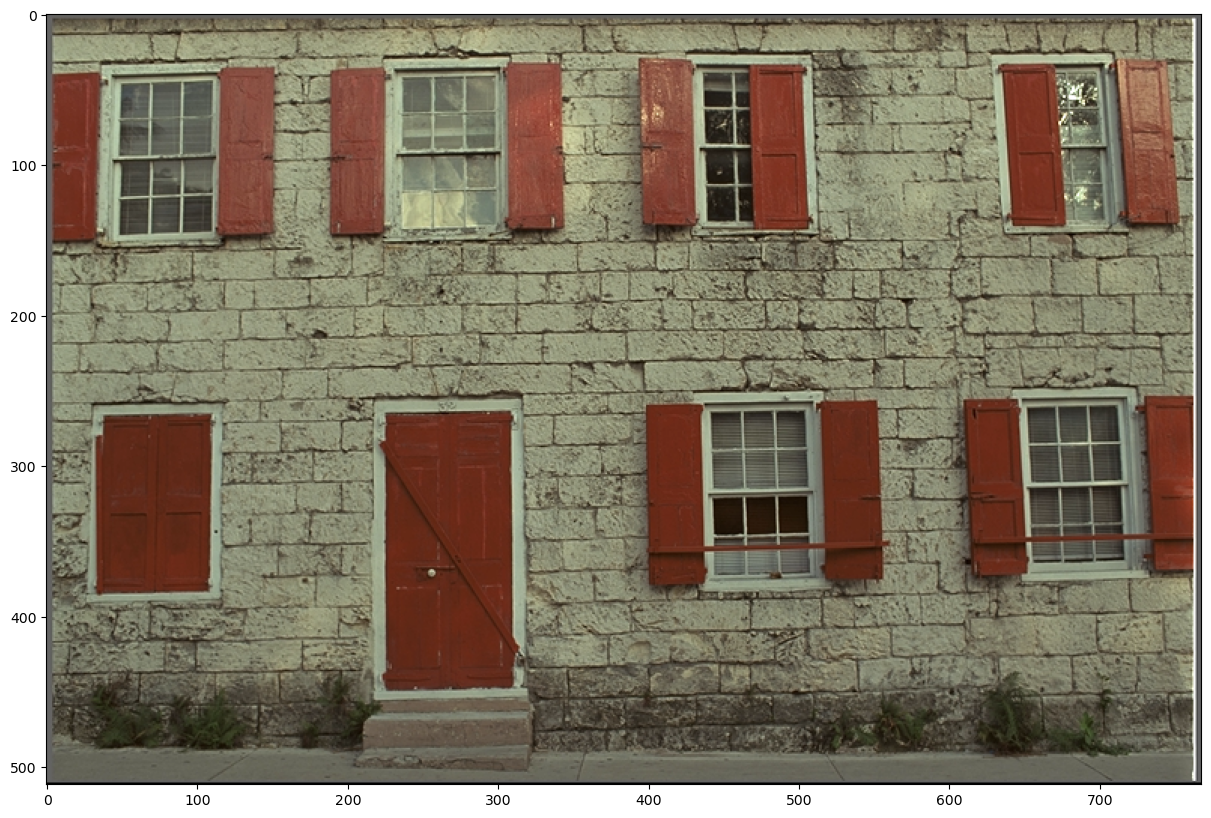

In [2]:
img = cv2.imread('data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Convolution
Let us implement the convolution operation so we can filter the image with specified kernels.

In [ ]:
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
rows, cols, channels = img.shape
out = np.zeros_like(img)

# Sliding window applied to each colour channel
for r in range(1, rows - 1):
    for c in range(1, cols - 1):
        for ch in range(0, channels):
            block = img[r-1:r+2, c-1:c+2, ch]
            out[r, c, ch] = np.sum(block * kernel)
            
plt.imshow(out)

OpenCV already includes a large set of predefined filters. It also allows us to apply our own custom filters. Let's build a Gaussian kernel and apply it to the image.

In [ ]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
out = cv2.filter2D(img, ddepth=-1, kernel=kernel, borderType=cv2.BORDER_REPLICATE)
plt.imshow(out)
print(kernel)

In [ ]:
# Or even simpler for predefined filters
out = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=5)
plt.imshow(out)

In [ ]:
out = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)
plt.imshow(out)

### Denoising
Denoising is the operation of removing (reducing) noise from a signal.

In [ ]:
img = cv2.imread('data/kodim07.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

noisy = img/255 + 0.1*np.random.randn(*img.shape)
noisy[noisy < 0] = 0
noisy[noisy > 1] = 1
noisy = (255*noisy).astype(np.uint8)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(noisy), plt.title('Noisy')

In [ ]:
# Apply Gaussian low-pass filter to reduce noise
out = cv2.GaussianBlur(noisy, ksize=(5,5), sigmaX=5)
plt.subplot(121), plt.imshow(noisy)
plt.subplot(122), plt.imshow(out)

In [ ]:
plt.subplot(121), plt.imshow(noisy[0:300, 0:300, :])
plt.subplot(122), plt.imshow(out[0:300, 0:300, :])

In [ ]:
# Compare with bilateral filter
bilat = cv2.bilateralFilter(noisy, d=9, sigmaColor=75, sigmaSpace=75)
plt.subplot(121), plt.imshow(out[200:600, 300:600, :])
plt.subplot(122), plt.imshow(bilat[200:600, 300:600, :])

### Salt & Pepper Noise
Impulsive noise that saturates pixel values to white or black.

In [ ]:
noisy = np.zeros_like(img)
rows, cols, _ = img.shape

probability = 0.1
for r in range(rows):
    for c in range(cols):
        if np.random.rand() < probability:
            # 50% chance of getting salt or pepper
            if np.random.rand() < 0.5:
                noisy[r, c, :] = 255
            else:
                noisy[r, c, :] = 0
        else:
            noisy[r, c, :] = img[r, c, :]
            
plt.imshow(noisy)

Let's apply Gaussian filtering to reduce the noise.

In [ ]:
out = cv2.GaussianBlur(noisy, ksize=(5,5), sigmaX=5)
plt.subplot(121), plt.imshow(noisy)
plt.subplot(122), plt.imshow(out)

In [ ]:
plt.subplot(121), plt.imshow(noisy[200:600, 300:600, :])
plt.subplot(122), plt.imshow(out[200:600, 300:600, :])

Gaussian filters do not handle well impulsive noises. We can try **median** filters instead.

In [ ]:
median = cv2.medianBlur(noisy, ksize=5)
plt.subplot(121), plt.imshow(noisy[200:600, 300:600, :])
plt.subplot(122), plt.imshow(median[200:600, 300:600, :])